In [ ]:
pip install ta

In [ ]:

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout, BatchNormalization,RNN, TimeDistributed
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
from keras.models import Sequential
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
# from keras.utils.vis_utils import plot_model
from keras.utils import plot_model
import sklearn.metrics as metrics
import random
import keras
import keras.layers
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
# import keras
import ta
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

df=pd.read_csv("/content/drive/MyDrive/stock_price/merged_stock_data1.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
close_price_mid = []
close_price_25th = []
close_price_75th = []
for values in df['Close Price']:
  margin1 = round(random.uniform(-2,2),2)
  temp1 = values + ((margin1*values)/100)
  temp1 = round(temp1,2)
  close_price_mid.append(temp1)
  margin2 = round(random.uniform(-2,2),2)
  temp2 = values + ((margin2*values)/100)
  temp2 = round(temp2,2)
  close_price_25th.append(temp2)
  margin3 = round(random.uniform(-2,2),2)
  temp3 = values + ((margin3*values)/100)
  temp3 = round(temp3,2)
  close_price_75th.append(temp3)
df = df.assign(one_fourth_close_price = close_price_25th)
df = df.assign(mid_close_price = close_price_mid)
df = df.assign(three_fourth_close_price = close_price_75th)


In [ ]:
print(df)

            Open Price  High Price  Low Price  Close Price          WAP  \
Date                                                                      
2013-01-01      844.75      846.00     839.20       840.65   842.540559   
2013-01-02      845.00      855.90     843.00       847.75   849.658738   
2013-01-03      848.35      861.95     845.00       860.55   855.765026   
2013-01-04      860.60      864.50     853.70       860.75   860.012764   
2013-01-07      863.60      870.70     851.65       855.15   859.769087   
...                ...         ...        ...          ...          ...   
2024-03-13     2955.45     2965.95    2855.85      2864.70  2909.462683   
2024-03-14     2865.00     2897.35    2851.00      2865.25  2874.621359   
2024-03-15     2854.95     2866.45    2826.90      2837.25  2840.608395   
2024-03-18     2837.20     2883.00    2833.65      2878.35  2854.944498   
2024-03-19     2865.60     2873.60    2835.00      2850.75  2847.348767   

            No.of Shares

In [ ]:
df.head(5)


,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,one_fourth_close_price,mid_close_price,three_fourth_close_price
Date,,,,,,,,,,,,,,,
2013-01-01,844.75,846.00,839.20,840.65,842.540559,334981,5986,282235079.0,186192.0,55.58,6.80,-4.10,848.55,843.51,824.59
2013-01-02,845.00,855.90,843.00,847.75,849.658738,509928,12250,433264781.0,185543.0,36.39,12.90,2.75,863.86,852.84,863.01
2013-01-03,848.35,861.95,845.00,860.55,855.765026,603859,14667,516761413.0,294904.0,48.84,16.95,12.20,849.79,847.47,867.78
2013-01-04,860.60,864.50,853.70,860.75,860.012764,337994,8651,290679154.0,123867.0,36.65,10.80,0.15,866.43,873.14,876.59
2013-01-07,863.60,870.70,851.65,855.15,859.769087,302313,7758,259919372.0,84205.0,27.85,19.05,-8.45,844.46,860.11,844.03


In [ ]:
df.tail(5)

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,one_fourth_close_price,mid_close_price,three_fourth_close_price
Date,,,,,,,,,,,,,,,
2024-03-13,2955.45,2965.95,2855.85,2864.70,2909.462683,97957,8660,2.850022e+08,43718.0,44.63,110.10,-90.75,2879.60,2891.91,2881.03
2024-03-14,2865.00,2897.35,2851.00,2865.25,2874.621359,162637,20571,4.675198e+08,64504.0,39.66,46.35,0.25,2885.88,2864.68,2913.39
2024-03-15,2854.95,2866.45,2826.90,2837.25,2840.608395,396001,21991,1.124884e+09,75672.0,19.11,39.55,-17.70,2892.29,2865.91,2876.40
2024-03-18,2837.20,2883.00,2833.65,2878.35,2854.944498,146410,12317,4.179924e+08,66180.0,45.20,49.35,41.15,2863.09,2897.35,2873.46
2024-03-19,2865.60,2873.60,2835.00,2850.75,2847.348767,128206,10945,3.650472e+08,NaN,NaN,38.60,-14.85,2853.60,2808.27,2902.35


In [ ]:
print(df.isna().sum())
df = df.dropna()
print(df)
print(len(df))



Open Price                    0
High Price                    0
Low Price                     0
Close Price                   0
WAP                           0
No.of Shares                  0
No. of Trades                 0
Total Turnover (Rs.)          0
Deliverable Quantity         10
% Deli. Qty to Traded Qty    10
Spread High-Low               0
Spread Close-Open             0
one_fourth_close_price        0
mid_close_price               0
three_fourth_close_price      0
dtype: int64
            Open Price  High Price  Low Price  Close Price          WAP  \
Date                                                                      
2013-01-01      844.75      846.00     839.20       840.65   842.540559   
2013-01-02      845.00      855.90     843.00       847.75   849.658738   
2013-01-03      848.35      861.95     845.00       860.55   855.765026   
2013-01-04      860.60      864.50     853.70       860.75   860.012764   
2013-01-07      863.60      870.70     851.65       855.1

In [ ]:



df_first = df
df_first['EMA_50'] = ta.trend.ema_indicator(df['Close Price'], window=50)
df_first['EMA_200'] = ta.trend.ema_indicator(df['Close Price'], window=200)
df_first['SMA_50'] = ta.trend.sma_indicator(df['Close Price'], window=50)
df_first['SMA_200'] = ta.trend.sma_indicator(df['Close Price'], window=200)
df_first['RSI'] = ta.momentum.rsi(df['Close Price'], window=14)
df_first['MACD'] = ta.trend.macd(df['Close Price'], window_slow=26, window_fast=12)
df_first['BB_upper'], df_first['BB_middle'], df_first['BB_lower'] = ta.volatility.bollinger_hband_indicator(df['Close Price']), ta.volatility.bollinger_mavg(df['Close Price']), ta.volatility.bollinger_lband_indicator(df['Close Price'])
df_first['%K'] = ta.momentum.stoch(high=df['High Price'],low=df['Low Price'], close=df['Close Price'], window=14)
df_first['%D'] = df_first['%K'].rolling(window=3).mean()
df_first['OBV'] = ta.volume.on_balance_volume(df['Close Price'], df['Close Price'].diff())
df_first['ATR'] = ta.volatility.average_true_range(high=df['High Price'],low=df['Low Price'], close=df['Close Price'], window=14)


<ipython-input-13-c916f29d0748>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first['EMA_50'] = ta.trend.ema_indicator(df['Close Price'], window=50)
<ipython-input-13-c916f29d0748>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first['EMA_200'] = ta.trend.ema_indicator(df['Close Price'], window=200)
<ipython-input-13-c916f29d0748>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [ ]:
df_first

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,...,SMA_200,RSI,MACD,BB_upper,BB_middle,BB_lower,%K,%D,OBV,ATR
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,844.75,846.00,839.20,840.65,842.540559,334981,5986,2.822351e+08,186192.0,55.58,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.000000
2013-01-02,845.00,855.90,843.00,847.75,849.658738,509928,12250,4.332648e+08,185543.0,36.39,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,7.10,0.000000
2013-01-03,848.35,861.95,845.00,860.55,855.765026,603859,14667,5.167614e+08,294904.0,48.84,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,19.90,0.000000
2013-01-04,860.60,864.50,853.70,860.75,860.012764,337994,8651,2.906792e+08,123867.0,36.65,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,20.10,0.000000
2013-01-07,863.60,870.70,851.65,855.15,859.769087,302313,7758,2.599194e+08,84205.0,27.85,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,25.70,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-12,2932.00,2976.30,2932.00,2950.20,2958.248359,83500,7871,2.470137e+08,23642.0,28.31,...,2515.67050,54.016989,34.891997,0.0,2960.0675,0.0,39.959759,36.981891,50878.95,51.891975
2024-03-13,2955.45,2965.95,2855.85,2864.70,2909.462683,97957,8660,2.850022e+08,43718.0,44.63,...,2517.37625,43.096091,24.595116,0.0,2955.1725,1.0,5.238236,23.288668,50964.45,56.049691
2024-03-14,2865.00,2897.35,2851.00,2865.25,2874.621359,162637,20571,4.675198e+08,64504.0,39.66,...,2519.02425,43.175678,16.291348,0.0,2951.3400,1.0,8.199079,17.799025,50965.00,55.356856


In [ ]:
print(df_first.isna().sum())

Open Price                     0
High Price                     0
Low Price                      0
Close Price                    0
WAP                            0
No.of Shares                   0
No. of Trades                  0
Total Turnover (Rs.)           0
Deliverable Quantity           0
% Deli. Qty to Traded Qty      0
Spread High-Low                0
Spread Close-Open              0
one_fourth_close_price         0
mid_close_price                0
three_fourth_close_price       0
EMA_50                        49
EMA_200                      199
SMA_50                        49
SMA_200                      199
RSI                           13
MACD                          25
BB_upper                       0
BB_middle                     19
BB_lower                       0
%K                            13
%D                            15
OBV                            1
ATR                            0
dtype: int64


In [ ]:
df_first = df_first.dropna()

In [ ]:
print(len(df_first))



4997


In [ ]:
rev_df = df_first #reverse here if data is from 2024 to 2014
rev_df

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,...,SMA_200,RSI,MACD,BB_upper,BB_middle,BB_lower,%K,%D,OBV,ATR
Date,,,,,,,,,,,,,,,,,,,,,
2013-10-18,882.00,907.95,880.75,905.35,898.932383,817942,29477,7.352746e+08,378232.0,46.24,...,841.81775,65.423214,6.573653,1.0,859.3650,0.0,97.093348,77.499025,2285.20,22.679700
2013-10-21,905.00,915.00,896.75,913.35,906.916068,472393,19161,4.284208e+08,208968.0,44.24,...,842.18125,67.240299,9.731232,1.0,860.4800,0.0,98.290155,90.303818,2293.20,22.363293
2013-10-22,907.40,911.00,897.80,903.60,903.439230,352813,13335,3.187451e+08,138307.0,39.20,...,842.46050,62.901675,11.316445,0.0,861.5300,0.0,88.186528,94.523344,2302.95,21.876629
2013-10-23,904.00,909.45,888.55,895.85,897.836431,267160,12124,2.398660e+08,67046.0,25.10,...,842.63700,59.609236,11.811224,0.0,862.5925,0.0,78.745838,88.407507,2310.70,21.806870
2013-10-24,896.00,909.95,881.00,884.60,895.523072,354743,18715,3.176805e+08,115663.0,32.60,...,842.75625,55.100580,11.166835,0.0,863.1050,0.0,61.199745,76.044037,2321.95,22.317093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-12,2932.00,2976.30,2932.00,2950.20,2958.248359,83500,7871,2.470137e+08,23642.0,28.31,...,2515.67050,54.016989,34.891997,0.0,2960.0675,0.0,39.959759,36.981891,50878.95,51.891975
2024-03-13,2955.45,2965.95,2855.85,2864.70,2909.462683,97957,8660,2.850022e+08,43718.0,44.63,...,2517.37625,43.096091,24.595116,0.0,2955.1725,1.0,5.238236,23.288668,50964.45,56.049691
2024-03-14,2865.00,2897.35,2851.00,2865.25,2874.621359,162637,20571,4.675198e+08,64504.0,39.66,...,2519.02425,43.175678,16.291348,0.0,2951.3400,1.0,8.199079,17.799025,50965.00,55.356856


In [ ]:

print("Dataframe Shape:" , rev_df. shape)
print("Null Value Present: ", rev_df.isnull().values.any())

Dataframe Shape: (4997, 28)
Null Value Present:  False


<Axes: xlabel='Date'>

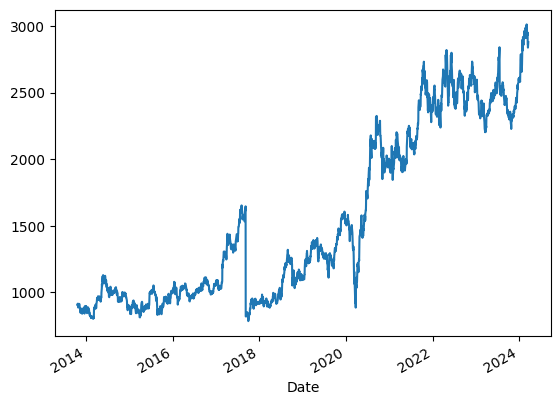

In [ ]:

rev_df['Close Price'].plot()


In [ ]:

#Selecting the Features
features = ['Open Price', 'High Price', 'Low Price', 'No.of Shares','one_fourth_close_price','mid_close_price','three_fourth_close_price','EMA_50','EMA_200','RSI','MACD','%K','%D','OBV','ATR','BB_upper','BB_middle','BB_lower','Close Price']


In [ ]:
#Scaling
output_var = pd.DataFrame(rev_df['Close Price'])
# un_normalized_var = pd.DataFrame(rev_df['Close Price'])
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(rev_df[features])
output_var = scaler.fit_transform(output_var)
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=rev_df.index)


In [ ]:
feature_transform.head()

,Open Price,High Price,Low Price,No.of Shares,one_fourth_close_price,mid_close_price,three_fourth_close_price,EMA_50,EMA_200,RSI,MACD,%K,%D,OBV,ATR,BB_upper,BB_middle,BB_lower,Close Price
Date,,,,,,,,,,,,,,,,,,,
2013-10-18,0.040978,0.051293,0.045899,0.001985,0.051998,0.052650,0.054266,0.018881,0.002157,0.672312,0.723708,0.978689,0.788890,0.000000,0.128559,1.0,0.023559,0.0,0.055260
2013-10-21,0.051335,0.054453,0.053188,0.001115,0.066064,0.058605,0.064623,0.019971,0.002543,0.693395,0.734224,0.990788,0.919849,0.000164,0.125067,1.0,0.024077,0.0,0.058849
2013-10-22,0.052416,0.052660,0.053666,0.000814,0.054002,0.054617,0.050801,0.020829,0.002869,0.643057,0.739504,0.888643,0.963004,0.000364,0.119697,0.0,0.024566,0.0,0.054475
2013-10-23,0.050885,0.051965,0.049452,0.000599,0.058760,0.044516,0.062209,0.021504,0.003149,0.604857,0.741152,0.793200,0.900455,0.000523,0.118927,0.0,0.025059,0.0,0.050999
2013-10-24,0.047282,0.052189,0.046013,0.000819,0.042987,0.041304,0.056982,0.021934,0.003363,0.552546,0.739005,0.615813,0.774009,0.000754,0.124557,0.0,0.025298,0.0,0.045953


In [ ]:
output_var

array([[0.05526027],
       [0.05884859],
       [0.05447532],
       ...,
       [0.93435601],
       [0.92179686],
       [0.9402319 ]])

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(feature_transform, output_var, test_size=0.1,shuffle=False)
# tempa,tempb,tempc,un_normalized_y_test = train_test_split(feature_transform, un_normalized_var, test_size=0.1,shuffle=False)

print(X_test)
print(y_test)
# print(un_normalized_y_test)

            Open Price  High Price  Low Price  No.of Shares  \
Date                                                          
2023-01-03    0.800063    0.797517   0.805471      0.000269   
2023-01-04    0.796145    0.791512   0.790346      0.000362   
2023-01-04    0.796145    0.791512   0.790346      0.000362   
2023-01-05    0.780835    0.780935   0.785517      0.000289   
2023-01-05    0.780835    0.780935   0.785517      0.000289   
...                ...         ...        ...           ...   
2024-03-12    0.964110    0.978264   0.980388      0.000136   
2024-03-13    0.974670    0.973625   0.945696      0.000173   
2024-03-14    0.933940    0.942881   0.943486      0.000336   
2024-03-15    0.929414    0.929032   0.932507      0.000923   
2024-03-18    0.921421    0.936450   0.935582      0.000295   

            one_fourth_close_price  mid_close_price  three_fourth_close_price  \
Date                                                                            
2023-01-03        

In [ ]:

# 2. Sequence Creation
def create_sequences_X(data, seq_length):
    X = []
    for i in range(len(data) - seq_length ):
        X.append(data.iloc[i:i+seq_length])

    return np.array(X)
# def create_un_normalized_sequences_Y(data, seq_length):
#     Y = []
#     for i in range(seq_length,len(data)):
#         Y.append(data.iloc[i])

#     return np.array(Y)
def create_all_output_sequences_Y(data, seq_length):
    Y = []
    for i in range(len(data) - seq_length):
        Y.append(data[i+1:i+seq_length+1])

    return np.array(Y)


def create_sequences_Y(data, seq_length):
    Y = []
    for i in range(seq_length,len(data)):
        Y.append(data[i])

    return np.array(Y)

seq_length = 50 # Choose an appropriate sequence length
X_train_seq= create_sequences_X(X_train, seq_length)

y_train_seq = create_all_output_sequences_Y(y_train, seq_length)
X_test_seq = create_sequences_X(X_test, seq_length)

y_test_seq = create_all_output_sequences_Y(y_test, seq_length)



y_act = create_sequences_Y(y_test,seq_length)
# unnormal_y_test_seq = create_un_normalized_sequences_Y(un_normalized_y_test,seq_length)
print(len(X_test_seq))
print(len(y_test_seq))
# print(len(unnormal_y_test_seq))
print(X_test_seq)
print(y_test_seq)

print(y_act)
# print(unnormal_y_test_seq)

450
450
[[[0.80006304 0.79751714 0.8054714  ... 0.8094288  0.         0.79609321]
  [0.79614536 0.79151167 0.79034646 ... 0.80788909 0.         0.77866738]
  [0.79614536 0.79151167 0.79034646 ... 0.80634939 0.         0.77866738]
  ...
  [0.68491917 0.68726751 0.68932371 ... 0.71709071 0.         0.68346453]
  [0.68491917 0.68726751 0.68932371 ... 0.71421583 0.         0.68346453]
  [0.68460395 0.70187783 0.69572447 ... 0.71274352 0.         0.70405257]]

 [[0.79614536 0.79151167 0.79034646 ... 0.80788909 0.         0.77866738]
  [0.79614536 0.79151167 0.79034646 ... 0.80634939 0.         0.77866738]
  [0.78083487 0.78093488 0.78551741 ... 0.80485268 0.         0.77658167]
  ...
  [0.68491917 0.68726751 0.68932371 ... 0.71421583 0.         0.68346453]
  [0.68460395 0.70187783 0.69572447 ... 0.71274352 0.         0.70405257]
  [0.68460395 0.70187783 0.69572447 ... 0.71127121 0.         0.70405257]]

 [[0.79614536 0.79151167 0.79034646 ... 0.80634939 0.         0.77866738]
  [0.78083487 

In [ ]:

# 3. Model Building
model_with_peephole = Sequential([

    LSTM(units=450, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),activation='tanh', return_sequences=True),
    Dense(units=1)
])


multilayer_with_linear = Sequential([
    LSTM(units=250, activation='tanh', return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dense(units=200),  # Linear layer
    LSTM(units=250, activation='tanh', return_sequences=True),
    Dense(units=1)

])



two_layer_lstm = Sequential([
    LSTM(units=230, activation='tanh', return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    LSTM(units=230, activation='tanh', return_sequences=True),
    Dense(units=1)

])

three_layer_lstm = Sequential([
    LSTM(units=220, activation='tanh', return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    LSTM(units=180, activation='tanh', return_sequences=True),
    LSTM(units=180, activation='tanh', return_sequences=True),
    Dense(units=1)
])





# # 4. Model Training
model_with_peephole.compile(loss='mean_squared_error', optimizer='adam')

multilayer_with_linear.compile(loss='mean_squared_error', optimizer='adam')

two_layer_lstm.compile(loss='mean_squared_error', optimizer='adam')


three_layer_lstm.compile(loss='mean_squared_error', optimizer='adam')






print(model_with_peephole.summary())

print(multilayer_with_linear.summary())

print(two_layer_lstm.summary())

print(three_layer_lstm.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 450)           846000    
                                                                 
 dense (Dense)               (None, 50, 1)             451       
                                                                 
Total params: 846451 (3.23 MB)
Trainable params: 846451 (3.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50, 250)           270000    
                                                                 
 dense_1 (Dense)             (None, 50, 200)           50200     
                                                           

In [ ]:
y_actual = scaler.inverse_transform(y_act)
print(y_actual)

[[2351.8 ]
 [2355.4 ]
 [2355.4 ]
 [2336.35]
 [2336.35]
 [2322.75]
 [2322.75]
 [2377.4 ]
 [2377.4 ]
 [2430.1 ]
 [2430.1 ]
 [2429.65]
 [2429.65]
 [2439.85]
 [2439.85]
 [2415.3 ]
 [2415.3 ]
 [2434.5 ]
 [2434.5 ]
 [2379.  ]
 [2379.  ]
 [2367.55]
 [2367.55]
 [2385.8 ]
 [2385.8 ]
 [2369.1 ]
 [2369.1 ]
 [2321.95]
 [2321.95]
 [2343.25]
 [2343.25]
 [2327.85]
 [2327.85]
 [2385.05]
 [2385.05]
 [2407.8 ]
 [2407.8 ]
 [2417.55]
 [2417.55]
 [2360.15]
 [2360.15]
 [2323.15]
 [2323.15]
 [2284.9 ]
 [2284.9 ]
 [2276.5 ]
 [2276.5 ]
 [2236.85]
 [2236.85]
 [2226.05]
 [2226.05]
 [2223.05]
 [2223.05]
 [2201.6 ]
 [2201.6 ]
 [2270.05]
 [2270.05]
 [2276.65]
 [2276.65]
 [2247.55]
 [2247.55]
 [2203.5 ]
 [2203.5 ]
 [2237.5 ]
 [2237.5 ]
 [2247.95]
 [2247.95]
 [2235.25]
 [2235.25]
 [2331.05]
 [2331.05]
 [2331.75]
 [2331.75]
 [2325.5 ]
 [2325.5 ]
 [2341.  ]
 [2341.  ]
 [2324.6 ]
 [2324.6 ]
 [2336.3 ]
 [2336.3 ]
 [2346.4 ]
 [2346.4 ]
 [2355.65]
 [2355.65]
 [2366.8 ]
 [2366.8 ]
 [2340.05]
 [2340.05]
 [2351.65]
 [2351.65]

In [ ]:
def accuracy(y_test,y_pred):
  plt.plot(y_test, label='True Value')
  plt.plot(y_pred, label='LSTM Value')
  plt.title("Accuracy of Reliance stock")
  plt.xlabel('Time Scale')
  plt.ylabel('Scaled INR')
  plt.legend()
  plt.show()

  diff = y_pred - y_test
  var = ((abs(diff))/y_test)*100

  not_corr = [0,0,0,0,0,0,0,0,0,0]
  corr = [0,0,0,0,0,0,0,0,0,0]
  for i in range(0,10):
    for value in var :
      if value <= (i+1):
        corr[i] = corr[i]+1
      else:
        not_corr[i] = not_corr[i]+1
  for i in range(0,10):
    print("correctly predicted values in percentage range of ",i+1,"are: ",corr[i])
    print("Incorrectly predicted values in percentage range of ",i+1,"are: ",not_corr[i])
  accuracy = [0,0,0,0,0,0,0,0,0,0]
  for i in range(0,10):
    accuracy[i] = (corr[i]/(corr[i] + not_corr[i]))*100
    print("The accuracy of LSTM model in percentage range of ",i+1,"is :",accuracy[i])
  # y_pred=y_pred.flatten()
  # X_test=y_.flatten()
  mse = metrics.mean_squared_error(y_test,y_pred)
  mae = metrics.mean_absolute_error(y_test,y_pred)
  print(mse)
  print(mae)


In [ ]:

model_with_peephole.fit(X_train_seq, y_train_seq,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2,

                   )

Epoch 1/50
56/56 [==============================] - 60s 933ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 2/50
56/56 [==============================] - 27s 472ms/step - loss: 7.4693e-04 - val_loss: 0.0049
Epoch 3/50
56/56 [==============================] - 27s 486ms/step - loss: 4.9222e-04 - val_loss: 0.0033
Epoch 4/50
56/56 [==============================] - 28s 495ms/step - loss: 3.6271e-04 - val_loss: 0.0022
Epoch 5/50
56/56 [==============================] - 29s 502ms/step - loss: 2.8236e-04 - val_loss: 0.0016
Epoch 6/50
56/56 [==============================] - 27s 477ms/step - loss: 2.2865e-04 - val_loss: 0.0011
Epoch 7/50
56/56 [==============================] - 27s 486ms/step - loss: 1.9126e-04 - val_loss: 7.4734e-04
Epoch 8/50
56/56 [==============================] - 29s 510ms/step - loss: 1.6298e-04 - val_loss: 5.0498e-04
Epoch 9/50
56/56 [==============================] - 27s 479ms/step - loss: 1.4402e-04 - val_loss: 3.5895e-04
Epoch 10/50
56/56 [============================

15/15 [==============================] - 2s 77ms/step
450
450
[[2337.57393131]
 [2344.79878715]
 [2348.6758567 ]
 [2342.3524966 ]
 [2339.59804439]
 [2325.7803365 ]
 [2321.88957974]
 [2312.8572143 ]
 [2367.28900634]
 [2345.97548892]
 [2387.5197721 ]
 [2376.90168309]
 [2410.01690134]
 [2419.88604724]
 [2471.82636763]
 [2500.90146573]
 [2456.3001499 ]
 [2458.87215021]
 [2462.79373642]
 [2458.45316199]
 [2385.17979   ]
 [2384.49423332]
 [2374.00902989]
 [2361.3787875 ]
 [2373.41144345]
 [2369.28322017]
 [2354.41545047]
 [2361.29241187]
 [2320.33441986]
 [2299.28680647]
 [2307.25369537]
 [2317.30821665]
 [2306.40668271]
 [2316.14227861]
 [2371.059103  ]
 [2374.03387949]
 [2407.66947765]
 [2407.80515382]
 [2407.59678924]
 [2427.09057159]
 [2369.42740102]
 [2369.93223332]
 [2324.2234491 ]
 [2330.44249403]
 [2281.11749465]
 [2282.11240895]
 [2257.9055739 ]
 [2269.09546953]
 [2222.34247046]
 [2221.33121124]
 [2194.04741069]
 [2212.52674456]
 [2209.28539961]
 [2214.61955948]
 [2185.73262736]
 [2

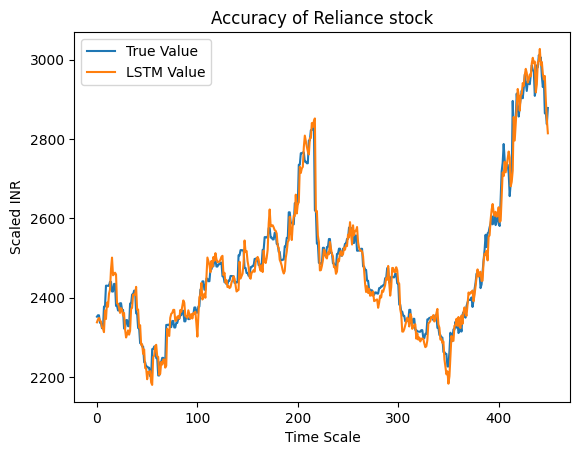

correctly predicted values in percentage range of  1 are:  296
Incorrectly predicted values in percentage range of  1 are:  154
correctly predicted values in percentage range of  2 are:  398
Incorrectly predicted values in percentage range of  2 are:  52
correctly predicted values in percentage range of  3 are:  438
Incorrectly predicted values in percentage range of  3 are:  12
correctly predicted values in percentage range of  4 are:  447
Incorrectly predicted values in percentage range of  4 are:  3
correctly predicted values in percentage range of  5 are:  448
Incorrectly predicted values in percentage range of  5 are:  2
correctly predicted values in percentage range of  6 are:  448
Incorrectly predicted values in percentage range of  6 are:  2
correctly predicted values in percentage range of  7 are:  449
Incorrectly predicted values in percentage range of  7 are:  1
correctly predicted values in percentage range of  8 are:  449
Incorrectly predicted values in percentage range of

In [ ]:

y_pred= model_with_peephole.predict(X_test_seq)
y_final_pred = []
for element in y_pred:
  y_final_pred.append(element[-1])


y_pred = scaler.inverse_transform(y_final_pred)




print(len(y_pred))
print(len(y_test_seq))
print(y_pred)
print(y_actual)



y_pred = y_pred.flatten()
y_test = y_actual.flatten()
accuracy(y_test,y_pred)

In [ ]:

multilayer_with_linear.fit(X_train_seq, y_train_seq,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2,

                   )

Epoch 1/50
56/56 [==============================] - 31s 478ms/step - loss: 0.0103 - val_loss: 0.0134
Epoch 2/50
56/56 [==============================] - 25s 445ms/step - loss: 0.0012 - val_loss: 0.0081
Epoch 3/50
56/56 [==============================] - 26s 452ms/step - loss: 7.6976e-04 - val_loss: 0.0053
Epoch 4/50
56/56 [==============================] - 26s 465ms/step - loss: 5.4647e-04 - val_loss: 0.0035
Epoch 5/50
56/56 [==============================] - 26s 467ms/step - loss: 4.0050e-04 - val_loss: 0.0022
Epoch 6/50
56/56 [==============================] - 26s 466ms/step - loss: 2.9554e-04 - val_loss: 0.0013
Epoch 7/50
56/56 [==============================] - 26s 466ms/step - loss: 2.1992e-04 - val_loss: 6.3346e-04
Epoch 8/50
56/56 [==============================] - 26s 470ms/step - loss: 1.6867e-04 - val_loss: 3.0636e-04
Epoch 9/50
56/56 [==============================] - 28s 501ms/step - loss: 1.3753e-04 - val_loss: 2.5825e-04
Epoch 10/50
56/56 [==============================] 

15/15 [==============================] - 2s 89ms/step
450
450
[[2342.90596502]
 [2349.73880841]
 [2352.41725007]
 [2344.19854301]
 [2337.43134509]
 [2324.41825936]
 [2319.14854898]
 [2312.05711026]
 [2371.09325459]
 [2394.65559461]
 [2439.38208865]
 [2423.26386568]
 [2435.26263582]
 [2424.16429834]
 [2404.07385975]
 [2421.40798574]
 [2391.36069677]
 [2406.16228946]
 [2426.84765676]
 [2434.68684262]
 [2374.74627906]
 [2375.5132946 ]
 [2370.80662041]
 [2364.38731692]
 [2379.38558026]
 [2377.99825486]
 [2362.91135684]
 [2367.84619556]
 [2336.68585701]
 [2330.80420856]
 [2347.85581981]
 [2349.64751602]
 [2330.66680488]
 [2330.46455303]
 [2377.03217672]
 [2376.36641999]
 [2404.05711617]
 [2405.44337849]
 [2401.90902085]
 [2415.20648171]
 [2363.72009845]
 [2361.75445502]
 [2322.22126214]
 [2327.97441024]
 [2292.88291771]
 [2301.29138537]
 [2282.29632258]
 [2286.55397642]
 [2246.22094526]
 [2251.2320603 ]
 [2224.79195027]
 [2232.57080608]
 [2225.8962294 ]
 [2227.50002541]
 [2199.87311431]
 [2

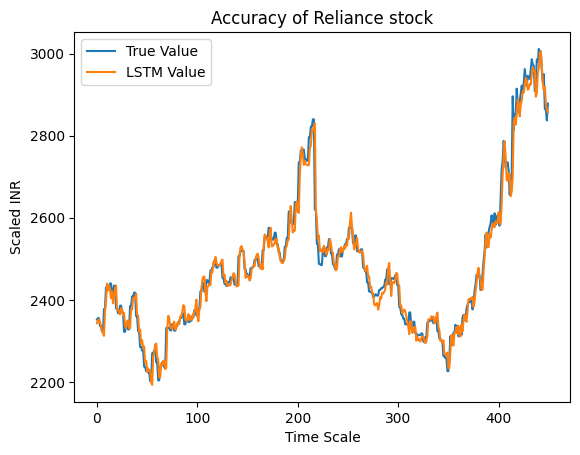

correctly predicted values in percentage range of  1 are:  331
Incorrectly predicted values in percentage range of  1 are:  119
correctly predicted values in percentage range of  2 are:  423
Incorrectly predicted values in percentage range of  2 are:  27
correctly predicted values in percentage range of  3 are:  444
Incorrectly predicted values in percentage range of  3 are:  6
correctly predicted values in percentage range of  4 are:  446
Incorrectly predicted values in percentage range of  4 are:  4
correctly predicted values in percentage range of  5 are:  448
Incorrectly predicted values in percentage range of  5 are:  2
correctly predicted values in percentage range of  6 are:  448
Incorrectly predicted values in percentage range of  6 are:  2
correctly predicted values in percentage range of  7 are:  449
Incorrectly predicted values in percentage range of  7 are:  1
correctly predicted values in percentage range of  8 are:  449
Incorrectly predicted values in percentage range of 

In [ ]:

y_pred= multilayer_with_linear.predict(X_test_seq)
y_final_pred = []
for element in y_pred:
  y_final_pred.append(element[-1])


y_pred = scaler.inverse_transform(y_final_pred)


print(len(y_pred))
print(len(y_test_seq))
print(y_pred)
print(y_actual)



y_pred = y_pred.flatten()
y_test = y_actual.flatten()
accuracy(y_test,y_pred)

In [ ]:

two_layer_lstm.fit(X_train_seq, y_train_seq,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2,

                   )

Epoch 1/50
56/56 [==============================] - 27s 404ms/step - loss: 0.0135 - val_loss: 0.0173
Epoch 2/50
56/56 [==============================] - 22s 397ms/step - loss: 0.0015 - val_loss: 0.0105
Epoch 3/50
56/56 [==============================] - 23s 408ms/step - loss: 0.0010 - val_loss: 0.0077
Epoch 4/50
56/56 [==============================] - 22s 400ms/step - loss: 7.8727e-04 - val_loss: 0.0056
Epoch 5/50
56/56 [==============================] - 22s 391ms/step - loss: 6.1565e-04 - val_loss: 0.0041
Epoch 6/50
56/56 [==============================] - 23s 409ms/step - loss: 4.8242e-04 - val_loss: 0.0029
Epoch 7/50
56/56 [==============================] - 22s 402ms/step - loss: 3.7487e-04 - val_loss: 0.0019
Epoch 8/50
56/56 [==============================] - 22s 386ms/step - loss: 2.8972e-04 - val_loss: 0.0012
Epoch 9/50
56/56 [==============================] - 23s 411ms/step - loss: 2.2323e-04 - val_loss: 6.2151e-04
Epoch 10/50
56/56 [==============================] - 22s 400ms/

15/15 [==============================] - 2s 74ms/step
450
450
[[2358.77516042]
 [2359.99385403]
 [2360.9356141 ]
 [2353.79155269]
 [2347.1428887 ]
 [2337.13447871]
 [2331.32232942]
 [2324.70781702]
 [2394.93864088]
 [2402.94512968]
 [2451.99651766]
 [2433.94813171]
 [2451.35029511]
 [2434.69548018]
 [2421.41967967]
 [2437.43026532]
 [2400.07201065]
 [2416.24405228]
 [2436.53381923]
 [2440.97432362]
 [2375.15118141]
 [2384.94737313]
 [2380.59164974]
 [2374.7514616 ]
 [2393.15186144]
 [2387.93570395]
 [2372.01175969]
 [2379.30810797]
 [2345.83090942]
 [2345.03479193]
 [2360.31756329]
 [2363.50083725]
 [2347.63895055]
 [2350.38024709]
 [2399.97008742]
 [2391.92373295]
 [2415.82958217]
 [2414.46856811]
 [2413.10423191]
 [2426.12582232]
 [2368.99073902]
 [2375.80604152]
 [2333.49647032]
 [2344.239206  ]
 [2306.46980336]
 [2315.2524768 ]
 [2293.43930961]
 [2302.11128937]
 [2261.70490538]
 [2265.27181999]
 [2235.88311193]
 [2247.54036614]
 [2241.24783549]
 [2242.73203448]
 [2214.64666814]
 [2

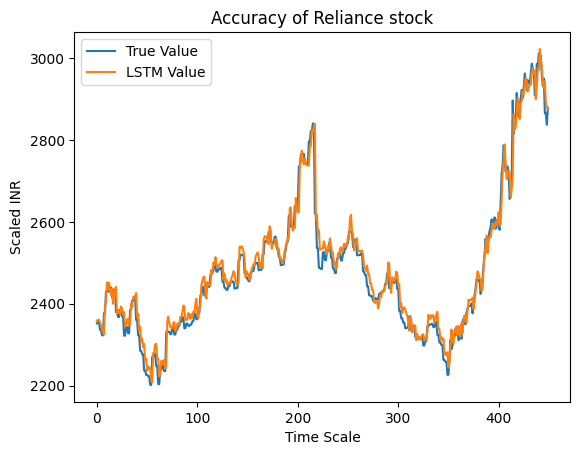

correctly predicted values in percentage range of  1 are:  317
Incorrectly predicted values in percentage range of  1 are:  133
correctly predicted values in percentage range of  2 are:  412
Incorrectly predicted values in percentage range of  2 are:  38
correctly predicted values in percentage range of  3 are:  444
Incorrectly predicted values in percentage range of  3 are:  6
correctly predicted values in percentage range of  4 are:  447
Incorrectly predicted values in percentage range of  4 are:  3
correctly predicted values in percentage range of  5 are:  448
Incorrectly predicted values in percentage range of  5 are:  2
correctly predicted values in percentage range of  6 are:  448
Incorrectly predicted values in percentage range of  6 are:  2
correctly predicted values in percentage range of  7 are:  449
Incorrectly predicted values in percentage range of  7 are:  1
correctly predicted values in percentage range of  8 are:  449
Incorrectly predicted values in percentage range of 

In [ ]:

y_pred= two_layer_lstm.predict(X_test_seq)
y_final_pred = []
for element in y_pred:
  y_final_pred.append(element[-1])


y_pred = scaler.inverse_transform(y_final_pred)


print(len(y_pred))
print(len(y_test_seq))
print(y_pred)
print(y_actual)



y_pred = y_pred.flatten()
y_test = y_actual.flatten()
accuracy(y_test,y_pred)

In [ ]:

three_layer_lstm.fit(X_train_seq, y_train_seq,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2,

                   )

Epoch 1/50
56/56 [==============================] - 34s 514ms/step - loss: 0.0085 - val_loss: 0.0251
Epoch 2/50
56/56 [==============================] - 27s 478ms/step - loss: 0.0020 - val_loss: 0.0157
Epoch 3/50
56/56 [==============================] - 27s 477ms/step - loss: 0.0013 - val_loss: 0.0107
Epoch 4/50
56/56 [==============================] - 27s 473ms/step - loss: 9.4440e-04 - val_loss: 0.0071
Epoch 5/50
56/56 [==============================] - 27s 478ms/step - loss: 6.5569e-04 - val_loss: 0.0041
Epoch 6/50
56/56 [==============================] - 29s 520ms/step - loss: 4.3854e-04 - val_loss: 0.0020
Epoch 7/50
56/56 [==============================] - 27s 484ms/step - loss: 2.7536e-04 - val_loss: 6.6673e-04
Epoch 8/50
56/56 [==============================] - 27s 482ms/step - loss: 1.7549e-04 - val_loss: 2.9636e-04
Epoch 9/50
56/56 [==============================] - 27s 479ms/step - loss: 1.3642e-04 - val_loss: 3.3441e-04
Epoch 10/50
56/56 [==============================] - 27

15/15 [==============================] - 3s 92ms/step
450
450
[[2322.61473633]
 [2330.54986557]
 [2334.40394591]
 [2334.27092745]
 [2336.38420675]
 [2327.24380534]
 [2327.72299073]
 [2319.58122441]
 [2367.39757386]
 [2385.06537552]
 [2415.14442415]
 [2404.03160214]
 [2426.79795756]
 [2423.66650898]
 [2428.68626158]
 [2452.01910821]
 [2425.10964632]
 [2433.95570619]
 [2444.96394724]
 [2448.83025306]
 [2397.40792064]
 [2392.53766431]
 [2382.46081825]
 [2372.63273398]
 [2377.66431341]
 [2374.08450889]
 [2358.34089036]
 [2358.41543917]
 [2316.95407659]
 [2301.1252784 ]
 [2316.18081543]
 [2320.09748487]
 [2308.08423021]
 [2312.19557703]
 [2350.13799668]
 [2351.83733742]
 [2380.01891291]
 [2385.76980196]
 [2392.92794924]
 [2411.75783526]
 [2380.073396  ]
 [2376.7173708 ]
 [2346.60882157]
 [2343.91709136]
 [2294.97480244]
 [2300.19428206]
 [2274.63294434]
 [2276.56031673]
 [2223.07480287]
 [2233.30167674]
 [2205.30627394]
 [2215.86416578]
 [2209.701863  ]
 [2212.06230947]
 [2188.51139762]
 [2

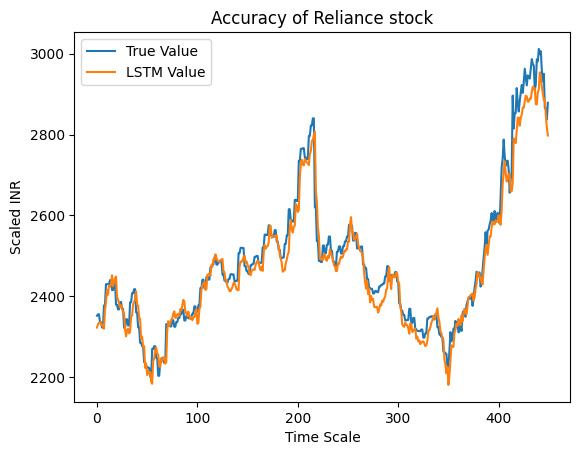

correctly predicted values in percentage range of  1 are:  249
Incorrectly predicted values in percentage range of  1 are:  201
correctly predicted values in percentage range of  2 are:  389
Incorrectly predicted values in percentage range of  2 are:  61
correctly predicted values in percentage range of  3 are:  436
Incorrectly predicted values in percentage range of  3 are:  14
correctly predicted values in percentage range of  4 are:  445
Incorrectly predicted values in percentage range of  4 are:  5
correctly predicted values in percentage range of  5 are:  448
Incorrectly predicted values in percentage range of  5 are:  2
correctly predicted values in percentage range of  6 are:  448
Incorrectly predicted values in percentage range of  6 are:  2
correctly predicted values in percentage range of  7 are:  448
Incorrectly predicted values in percentage range of  7 are:  2
correctly predicted values in percentage range of  8 are:  450
Incorrectly predicted values in percentage range of

In [ ]:

y_pred= three_layer_lstm.predict(X_test_seq)
y_final_pred = []
for element in y_pred:
  y_final_pred.append(element[-1])


y_pred = scaler.inverse_transform(y_final_pred)


print(len(y_pred))
print(len(y_test_seq))
print(y_pred)
print(y_actual)



y_pred = y_pred.flatten()
y_test = y_actual.flatten()
accuracy(y_test,y_pred)